In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('stats_2017.csv')

In [3]:
df.head()

,failure,failure_date,first_time_seen,last_time_seen,model,serial_number,year
0,False,NaN,2017-01-01,2017-07-17,Hitachi HDS5C3030ALA630,MJ0351YNG9Z0XA,2017
1,False,NaN,2017-01-01,2017-08-15,Hitachi HDS5C3030ALA630,MJ0351YNG9WJSA,2017
2,False,NaN,2017-01-01,2017-08-26,Hitachi HDS5C3030ALA630,MJ0351YNGABYAA,2017
3,False,NaN,2017-01-01,2017-04-18,Hitachi HDS5C3030ALA630,MJ0351YNG9Z7LA,2017
4,False,NaN,2017-01-01,2017-06-27,Hitachi HDS5C3030ALA630,MJ1311YNG7ESHA,2017


In [8]:
df[df.failure][df.failure_date < df.last_time_seen].sample(5)

/Users/romanmarakulin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,failure,failure_date,first_time_seen,last_time_seen,model,serial_number,year
8278,True,2017-08-26,2017-01-01,2017-08-27,ST4000DM000,Z300XGNY,2017
24497,True,2017-02-14,2017-01-01,2017-12-31,ST4000DM000,Z305FSJK,2017
82157,True,2017-02-20,2017-01-01,2017-02-21,ST4000DX000,Z1Z04SMV,2017
18224,True,2017-02-04,2017-01-01,2017-12-31,ST4000DM000,Z304L92J,2017
51761,True,2017-02-15,2017-02-14,2017-07-22,HGST HMS5C4040BLE640,PL1331LAHD1K7H,2017


In [4]:
def show_several_hds(data, smart_attribs):
    plt.figure(1, figsize=(10, 20))
    width, height = 2, len(smart_attribs)
    
    def make_subplot(data, sns, smart_attrib, idx, title, ax=None):
        ax = plt.subplot(height, width, idx, sharey=ax)
        for sn in sns:
            plt.plot(data[data.serial_number == sn][smart_attrib], label=sn)
        plt.title(title)
        plt.grid(True)
        return ax
    
    healthy_sns = set(data[data.failure == 0].serial_number[:5].values)
    failured_sns = set(data[data.failure == 1].serial_number[:5].values)
    idx = 1
    for smart_attrib in smart_attribs:
        ax = make_subplot(data, healthy_sns, smart_attrib, idx, 'health; '+smart_attrib)
        idx += 1
        make_subplot(data, failured_sns, smart_attrib, idx, 'failured; '+smart_attrib, ax)
        idx += 1
    plt.show()

In [3]:
PATH = 'model_2017_ST4000DM000.csv'
data = pd.read_csv(PATH)

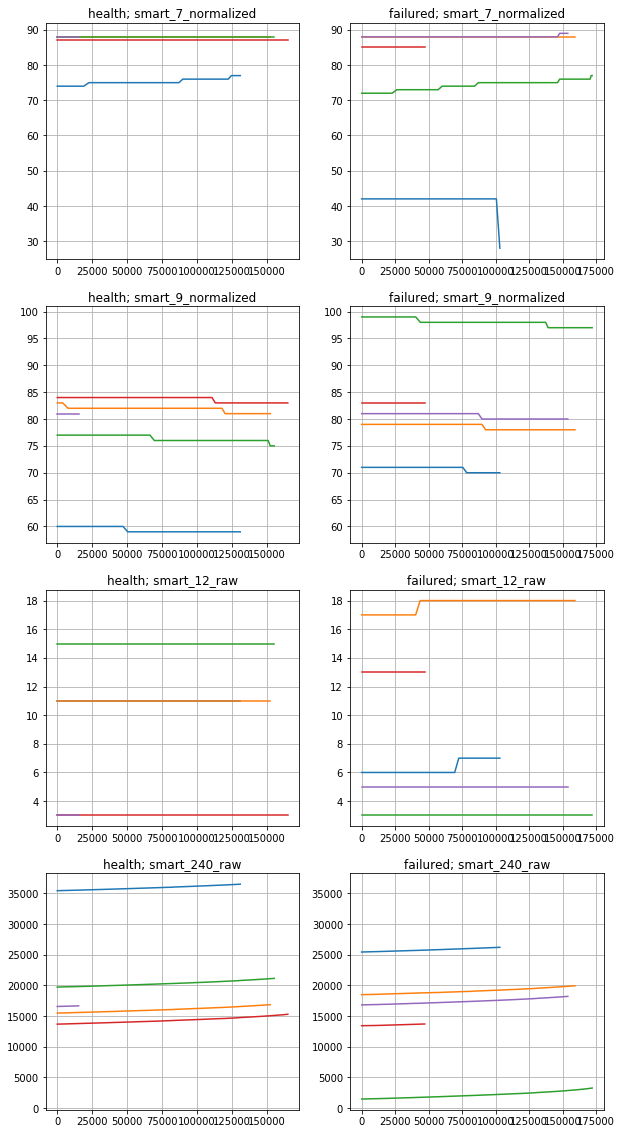

In [5]:
show_several_hds(data, smart_attribs=['smart_7_normalized', 'smart_9_normalized', 'smart_12_raw', 'smart_240_raw'])